# Part 1- Tracking Objects 

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import matplotlib.patches as patches

This function reads all the bbox of the images of file *filepath* to check if our tracker is correct

@params: 
- **file_path*** -> file path to the file taht contains the bounding boxes.

In [32]:
def getBoundingBoxes(file_path = "./MotorcycleChase/groundtruth_rect.txt"):
    boundingBoxes = {}
    with open(file_path,'r') as file:
        for line in file:
            l = line.split(',')
            id,x1,y1,width,height,visible = list(map(int,l))
            #bbox = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='red', facecolor='none')
            boundingBoxes[id] = (x1,y1,width,height)
    return boundingBoxes

Function to draw an img and also his boundÇing box

@params:

- ***img*** -> img to show.
- ***bboxPred*** -> Predicted bounding box.
- ***bboxReal*** -> Real bounging box.

In [4]:
def drawBox(img,bboxPred, bboxReal):
    x1,y1,width,height = bboxPred
    predRect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='red', facecolor='none')
    
    x2,y2,widt2,heigh2 = bboxReal
    realRect = patches.Rectangle((x2, y2), widt2, heigh2, linewidth=1, edgecolor='green', facecolor='none')
    
    fig,ax = plt.subplots()
    ax.imshow(img)
    ax.add_patch(predRect)
    ax.add_patch(realRect)
    plt.show()

Function to check if the prediction is correct, following the metric ***a***.  (A ∩ B)/(A U B) 

@params:

- ***bboxPred*** -> Predicted bounding box.
- ***bboxReal*** -> Real bounging box.

In [12]:
def getCorrectnes(bboxPred, bboxReal):
    xp, yp, wp, hp = bboxPred
    xr,yr, wr,hr = bboxReal
    
    
    x_left = max(xp, xr)
    y_top = max(yp, yr)
    x_right = min(xp + wp, xr + wr)
    y_bottom = min(yp + hp, yr + hr)
    
    if x_right < x_left or y_bottom < y_top:
      return 0
    
    intersection = (x_right - x_left) * (y_bottom - y_top)
    
    areaP = wp*hp
    areaR = wr*hr
    union = areaP + areaR - intersection
    
    return intersection / union

Function to generate the tracking

@params:

- ***mainDirectory*** -> Directory to where are located the frames to make the track. By default we use the *MotorcycleChase*
- ***maxFramesShow*** -> Maximum images to make the traking. By default = *200*
- ***trackAlg*** -> Tracking algotithm used. list of possibilities: [KCF, CSRT, MIL]. By default *KCF*

In [56]:
def trackObject(mainDirectory = "./MotorcycleChase/", maxFramesShow = 200, trackAlg =""):
    
    filepath = os.path.join(mainDirectory, "groundtruth_rect.txt")
    try:
        getBoundingBoxes(file_path = "./MotorcycleChase/groundtruth_rect.txt")
    except:
        print("Haven't been found the groundtruth_rect.txt file")
        
    if trackAlg == "KCF":    
        tracker = cv2.TrackerKCF_create()
    elif trackAlg == "CSRT":
        tracker = cv2.TrackerCSRT_create()
    elif trackAlg == "MIL":
        tracker = cv2.TrackerMIL_create()
    else:
        print("Tracker not recognised, list of possibilities: [KCF, CSRT, SiamRPN, MIL, NANO]. \n Usign KCF by default")
        tracker = cv2.TrackerKCF_create()

    i = 1
    framesShow = min(maxFramesShow, len(os.listdir(directory))) 
    correct = []
    succes = True
    
    direcory = os.path.join(mainDirectory, "img")
    for filename in os.listdir(directory)[1:maxFramesShow]:
        filepath = os.path.join(directory, filename)
        img = plt.imread(filepath)

        #Init the tracker in the first frame, otherwise update it
        if i == 1:
            tracker.init(img,boundingBoxes[i])
        else:
            succes,bbox = tracker.update(img)
        
        # Print the BBox on the image (just 1 of every 10 images) and also add the metric to the list
        if succes:
            if i % 10 == 0:
                drawBox(img,bbox,i)
                corr.append(getCorrectnes(bbox,boundingBoxes[i]))
        else:
            print("fail in the tracking")
        i += 1
    return corr

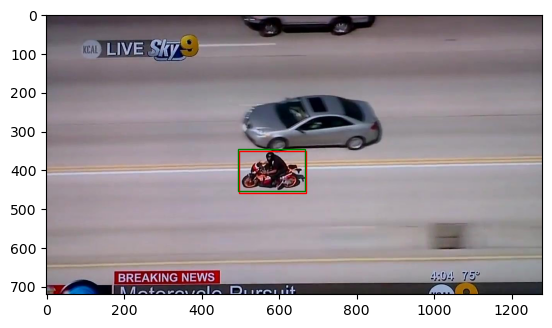

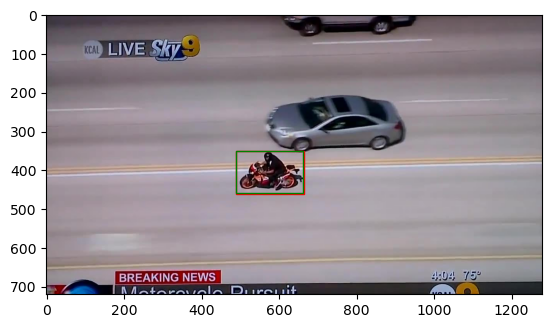

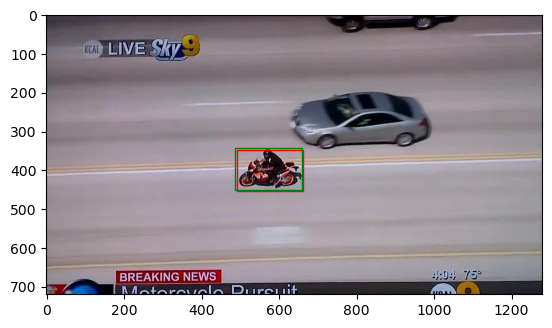

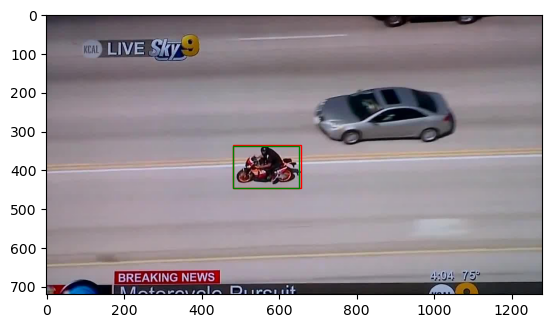

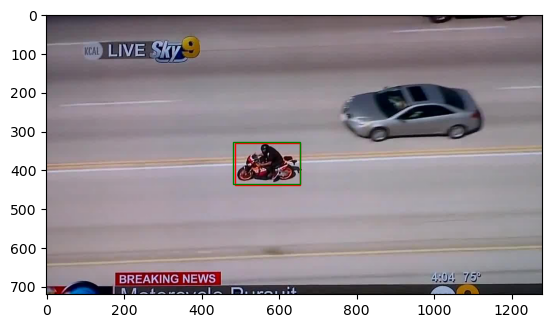

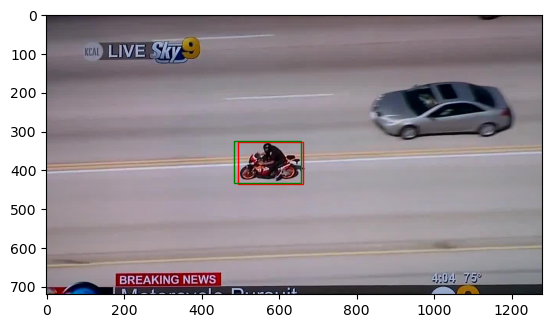

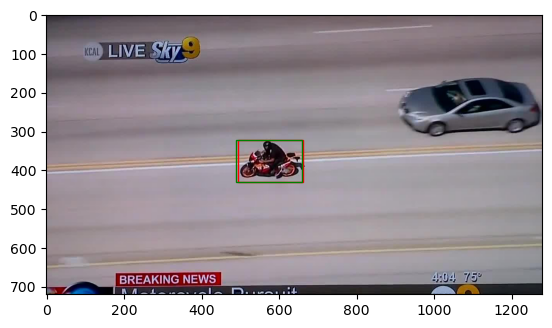

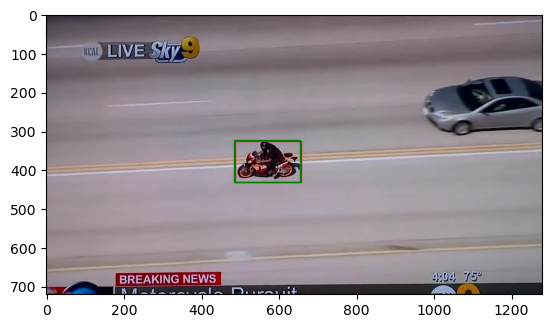

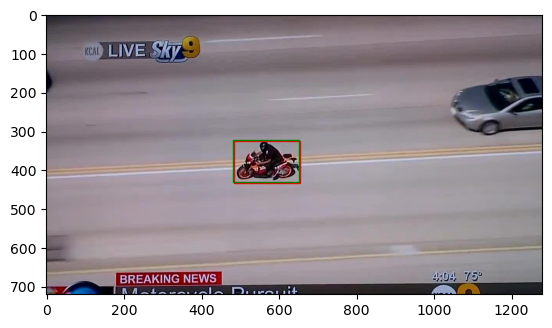

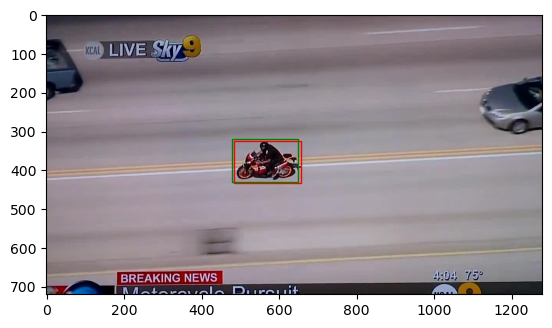

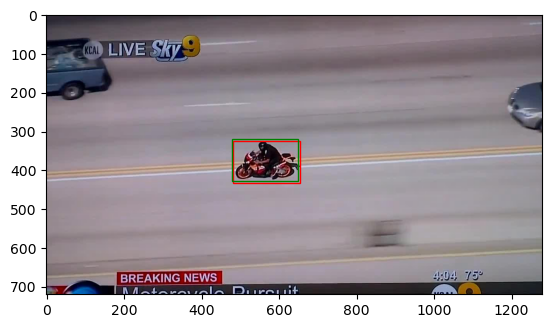

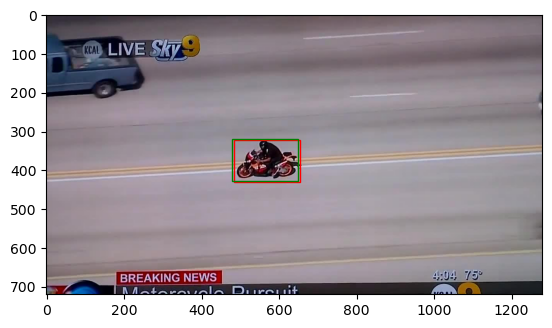

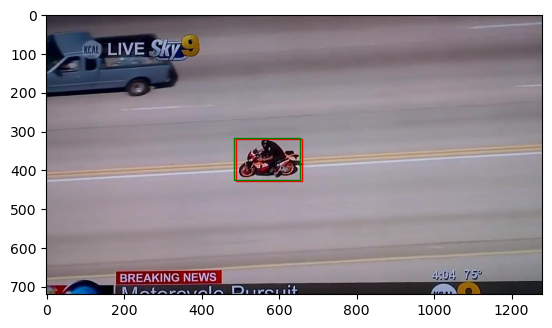

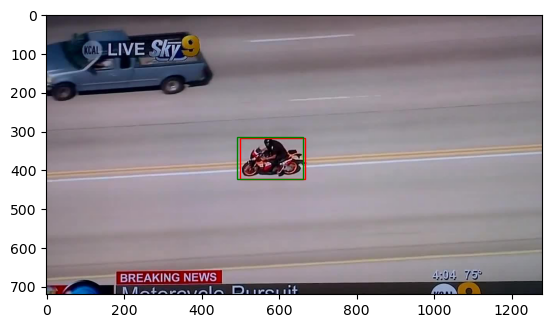

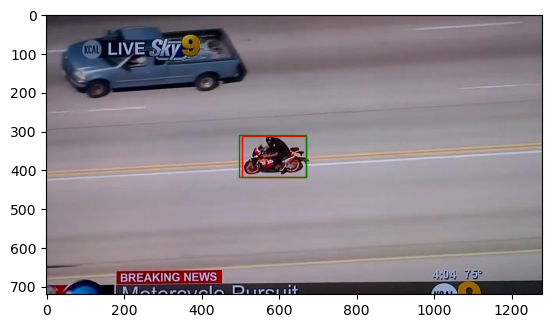

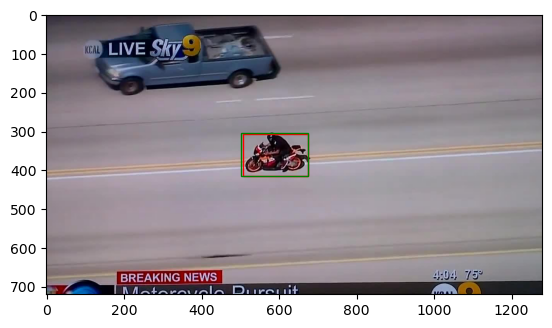

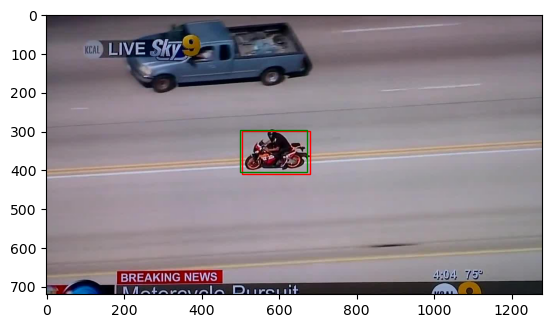

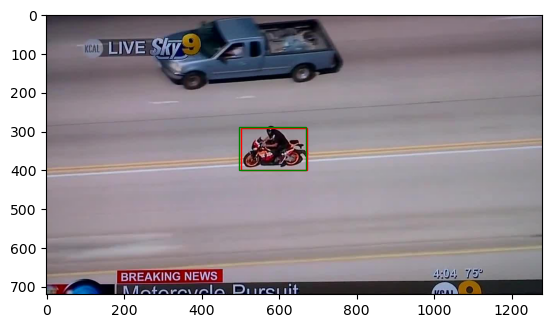

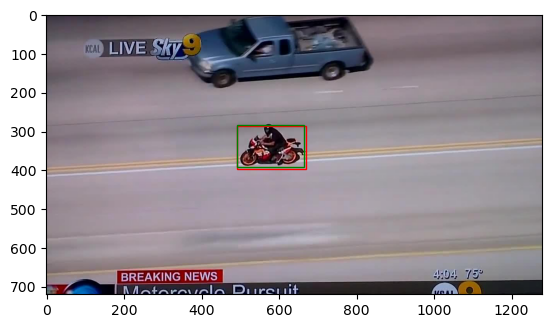

In [53]:
c = trackObject(trackAlg ="CSRT",maxFramesShow=100)